# Visualisering af DMI Vejrdata i en GUI

## Formål

Du skal hente aktuelle eller historiske vejrdata fra DMI’s API, indlæse dem i en pandas DataFrame, og præsentere resultaterne i en PySide6-applikation. Applikationen skal bruge Matplotlib som backend til at vise grafer eller bruge plotly til en interaktivt dashboard.

## Trin 1: Hent data fra DMI API

- DMI stiller åbne data til rådighed via DMI’s [Open Data](https://opendatadocs.dmi.govcloud.dk/en/Getting_Started) API.
- For at få adgang, skal man oprette en konto og generere en gratis API-nøgle på [DMI API Portal](https://opendatadocs.dmi.govcloud.dk/en/Authentication)
- Lav et Python-script, der henter data (JSON-format) og gemmer det i en pandas DataFrame. [Her](https://opendatadocs.dmi.govcloud.dk/en/APIs/Meteorological_Observation_API) finder du eksempler for **Meteorological Observation API**
    - Tip: brug [**requests**](https://pypi.org/project/requests/) til at hente data.
    - Husk at konvertere tidspunkter til **datetime**.

In [1]:
import requests
import pandas as pd
from datetime import datetime, timedelta, timezone
url = "https://dmigw.govcloud.dk/v2/metObs/collections/observation/items"

hours = 24
now = datetime.now(timezone.utc)
start = now - timedelta(hours=hours)
datetime_range = f"{start.isoformat()}/{now.isoformat()}"
params = {
    "api-key": "75ab0b53-550a-4ede-b9ae-d1d9bc108f48",   # <- indsæt din egen nøgle
    "stationId": "06081",       # station fx København
    "parameterId": "temp_dry",  # parameter fx temperatur
    "datetime": datetime_range,
    "limit": 1000
}



response = requests.get(url, params=params).json()
df = pd.json_normalize(response['features'])
print(df['geometry.coordinates'])
print(df['properties.value'])
df.head()
#print(response)
#print(df)

0      [8.0828, 55.5575]
1      [8.0828, 55.5575]
2      [8.0828, 55.5575]
3      [8.0828, 55.5575]
4      [8.0828, 55.5575]
             ...        
139    [8.0828, 55.5575]
140    [8.0828, 55.5575]
141    [8.0828, 55.5575]
142    [8.0828, 55.5575]
143    [8.0828, 55.5575]
Name: geometry.coordinates, Length: 144, dtype: object
0      7.4
1      7.4
2      7.5
3      7.4
4      7.4
      ... 
139    8.2
140    8.3
141    8.3
142    8.3
143    8.3
Name: properties.value, Length: 144, dtype: float64


,type,id,geometry.type,geometry.coordinates,properties.parameterId,properties.created,properties.value,properties.observed,properties.stationId
0,Feature,92be5f90-c1a5-977c-d750-ef06b7155c93,Point,"[8.0828, 55.5575]",temp_dry,2025-12-16T08:30:55.49059Z,7.4,2025-12-16T08:30:00Z,06081
1,Feature,8f2d3463-a525-7142-cae6-44490246f73b,Point,"[8.0828, 55.5575]",temp_dry,2025-12-16T08:20:55.3928Z,7.4,2025-12-16T08:20:00Z,06081
2,Feature,4ece615d-df22-d4b3-cb36-82675e8906ba,Point,"[8.0828, 55.5575]",temp_dry,2025-12-16T08:10:54.453599Z,7.5,2025-12-16T08:10:00Z,06081
3,Feature,1ff2c643-cdb1-637f-6229-949e0ea0f5d0,Point,"[8.0828, 55.5575]",temp_dry,2025-12-16T08:01:17.691196Z,7.4,2025-12-16T08:00:00Z,06081
4,Feature,9e77d332-47a1-89d1-8c23-909dfeb82db8,Point,"[8.0828, 55.5575]",temp_dry,2025-12-16T07:50:53.677199Z,7.4,2025-12-16T07:50:00Z,06081


In [2]:
to_drop =[
'geometry.type',
'id',
    'properties.parameterId',
    'properties.created',
    'geometry.coordinates',
    'properties.stationId',
    'type'
]

df_data = df.drop(to_drop, inplace=False, axis=1)

In [3]:
df_data.head(100)

,properties.value,properties.observed
0,7.4,2025-12-16T08:30:00Z
1,7.4,2025-12-16T08:20:00Z
2,7.5,2025-12-16T08:10:00Z
3,7.4,2025-12-16T08:00:00Z
4,7.4,2025-12-16T07:50:00Z
...,...,...
95,7.5,2025-12-15T16:40:00Z
96,7.4,2025-12-15T16:30:00Z
97,7.4,2025-12-15T16:20:00Z
98,7.4,2025-12-15T16:10:00Z


## Trin 2: Vælg et datasæt (fx temperatur over de seneste dage).

Udregn fx:

- gennemsnitstemperatur pr. dag
- højeste og laveste temperatur

In [4]:
import numpy as np

print(np.max(df_data['properties.value']))
print(np.min(df_data['properties.value']))
print(np.average(df_data['properties.value']))


8.3
6.7
7.4854166666666675


## Trin 3: Lav en PySide6 GUI med Matplotlib

Byg en simpel GUI med PySide6. GUI’en skal have:
 
- En knap til at hente/loade data fra DMI.
- En figur (Matplotlib-plot) til at vise data.


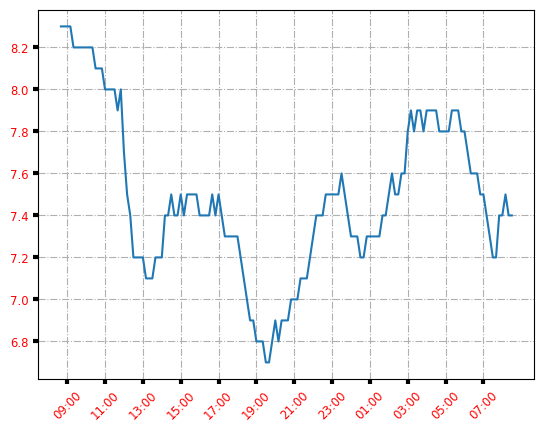

In [7]:
import matplotlib.pyplot as plt

y = list(df_data['properties.value'])

x = []

z = []

for i in df_data['properties.observed']:
    x = i[11:]
    z.append(x[:5])
    


#print(z)


times = []

for j in range(len(z)):
    times.append(z[j])
times.reverse()
y.reverse()

ticks = []

other = 0

for k in times:
    if k[3:] == '00':
        if other == 0:
            ticks.append(k)
            other = 1
        else:
            other -= 1
        

#df_data2 = pd.to_datetime(df_data['properties.observed'])
df_data2 = df_data.style.format({'properties.observed': '{:%T}'})
print(df_data2)
#x = df_data2

fig, ax = plt.subplots()
ax.plot(times, y)

ax.set_xticks(ticks)
ax.set_xticklabels(ticks, rotation=45)

ax.grid(True, linestyle='-.')
ax.tick_params(labelcolor='r', labelsize='small', width=3)

#print(df_data)
#print(df_data2)
#df_data.plot()
#plt.bar(x,y)
plt.show()


## Ekstra udfordringer:
- Brug en DateTimePicker i PySide6, så man kan vælge tidsperiode.
- En dropdown-menu, hvor man kan vælge parameter (fx temperatur, nedbør).
- Tilføj mulighed for at vælge forskellige stationer (fx København, Aalborg).
- Lav et interaktivt `plotly.express` line plot af temperatur over tid.